In [1]:
import splitfolders

# Define the dataset and output directories
dataset = r"datasets/train"  # Original dataset containing all data
output = r"Splitted datasets/"

# Split the dataset into training, validation, and testing sets
splitfolders.ratio(
    dataset,
    output=output,
    seed=1337,
    ratio=(.8, .1, .1),  # 80% train, 10% val, 10% test
    group_prefix=None,
    move=False  # Set to True if you want to move files instead of copying
)

KeyboardInterrupt: 

In [1]:
trainpath= 'Splitted datasets/train'
validpath='Splitted datasets/val'
testpath='Splitted datasets/test'

In [2]:
img_width, img_height = (128,128)
epochs = 10
batch_size = 32

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

training_set = tf.keras.utils.image_dataset_from_directory(
    trainpath,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_width, img_height),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

validation_set = tf.keras.utils.image_dataset_from_directory(
    validpath,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_width, img_height),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17477 files belonging to 6 classes.
Found 2182 files belonging to 6 classes.


In [4]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[img_width, img_height,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

#Output Layer
cnn.add(tf.keras.layers.Dense(units=6,activation='softmax'))

C:\Users\micom\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         9,006 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,794,730 (29.73 MB)

 Trainable params: 7,794,730 (29.73 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=epochs)

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 315s 572ms/step - accuracy: 0.4073 - loss: 1.5238 - val_accuracy: 0.5055 - val_loss: 1.3153
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 489s 895ms/step - accuracy: 0.5320 - loss: 1.2158 - val_accuracy: 0.5784 - val_loss: 1.0990
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 365s 668ms/step - accuracy: 0.6070 - loss: 1.0477 - val_accuracy: 0.6485 - val_loss: 0.9261
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 356s 650ms/step - accuracy: 0.6658 - loss: 0.9180 - val_accuracy: 0.6379 - val_loss: 0.9701
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 350s 640ms/step - accuracy: 0.6972 - loss: 0.8124 - val_accuracy: 0.6916 - val_loss: 0.8240
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 363s 663ms/step - accuracy: 0.7503 - loss: 0.6787 - val_accuracy: 0.7319 - val_loss: 0.7886
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 301s 551ms/step - accuracy: 0.7983 - loss: 0.5613 - val_accuracy: 0.7273 - val_loss: 0.7761
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 330s 603ms/step - accuracy: 0.8277 -

: 

In [9]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import keras

x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Flatten()(base_model.output)
x = keras.layers.Dense(1024, activation='relu')(x)

x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(512, activation='relu')(x)

x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(train_set.num_classes, activation='softmax')(x)

for layer in base_model.layers[:-100]:
   layer.trainable = False

model = tf.keras.models.Model(base_model.input, x)

model.compile(
        optimizer = Adam(learning_rate=0.000001), 
        loss = 'categorical_crossentropy', 
        metrics = ['acc']
    )

In [10]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 126,877,062 (484.00 MB)

 Trainable params: 125,441,286 (478.52 MB)

 Non-trainable params: 1,435,776 (5.48 MB)

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Define your file paths # Use .keras extension for ModelCheckpoint
saved_model_h5 = "model/model.keras"        # Desired .h5 format

# Save the model according to the conditions
checkpoint = ModelCheckpoint(
    filepath=saved_model_h5,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='auto'
)

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=model/model.h5

In [12]:
reduce = ReduceLROnPlateau(
        monitor='val_loss', 
        verbose=1, 
        factor=0.1, 
        patience=2, 
        mode='auto'
    )

In [13]:
epochs = 10

In [14]:
# Train the model
trained_model = model.fit(
        train_set,
        steps_per_epoch = train_set.samples//train_set.batch_size,
        epochs = epochs,
        validation_data = valid_set,
        validation_steps = valid_set.samples//valid_set.batch_size,
        callbacks=[checkpoint,reduce]
    )

C:\Users\micom\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 40/546 ━━━━━━━━━━━━━━━━━━━━ 41:15 5s/step - acc: 0.1965 - loss: 3.9558

KeyboardInterrupt: 

In [16]:
model.save('model.h5')

In [3]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('model.h5')


In [8]:
from tensorflow.keras.models import load_model

# Load the saved model
new_model = load_model('model.h5')

# Make predictions
predict = new_model.predict(
    test_set,
    steps=len(test_set),
    verbose=1
)


C:\Users\micom\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step


In [9]:
predict

array([[0.6027776 , 0.1363712 , 0.07324857, ..., 0.00639998, 0.06195904,
        0.03813966],
       [0.44248846, 0.0566634 , 0.01458697, ..., 0.02116473, 0.39487582,
        0.00475489],
       [0.23965152, 0.10329434, 0.06198595, ..., 0.01704581, 0.13745648,
        0.08462142],
       ...,
       [0.01547468, 0.12222957, 0.04880742, ..., 0.0220616 , 0.02389973,
        0.7442413 ],
       [0.01843761, 0.06176727, 0.33603722, ..., 0.0918006 , 0.05374863,
        0.40027198],
       [0.03458988, 0.14568381, 0.32330364, ..., 0.02339498, 0.079331  ,
        0.35006046]], dtype=float32)

In [10]:
import numpy as np
rounded_predictions = np.argmax(predict,axis=-1)
rounded_predictions

array([0, 0, 3, 0, 4, 0, 0, 6, 0, 1, 2, 2, 6, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 5, 0, 1, 5, 0, 0, 5, 5, 0, 5, 0, 2,
       2, 2, 1, 4, 6, 0, 0, 1, 1, 1, 0, 6, 6, 0, 1, 0, 6, 1, 6, 2, 1, 1,
       0, 5, 1, 1, 5, 2, 1, 1, 1, 2, 1, 1, 2, 4, 1, 5, 1, 1, 5, 1, 1, 1,
       1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 5, 5, 1, 1, 1, 1, 5,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 4, 1, 3, 2, 2, 6, 6, 2, 2, 2,
       5, 2, 6, 2, 3, 2, 1, 6, 2, 0, 6, 2, 2, 2, 2, 2, 2, 6, 5, 2, 2, 1,
       2, 2, 2, 5, 4, 2, 4, 6, 1, 2, 2, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 6, 3, 2, 2, 3, 6, 1, 6, 1, 3, 3, 5, 2, 5, 1, 3, 2, 2, 3,
       2, 2, 2, 2, 2, 4, 1, 5, 2, 1, 2, 0, 2, 2, 3, 1, 3, 3, 6, 3, 3, 3,
       6, 5, 2, 2, 4, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 2, 6, 6, 3, 3, 3, 3,
       6, 5, 6, 3, 0, 3, 6, 2, 1, 6, 2, 6, 0, 2, 2, 1, 1, 6, 2, 4, 2, 2,
       2, 2, 6, 2, 2, 2, 2, 4, 2, 1, 2, 6, 5, 2, 5, 3, 1, 5, 5, 5, 5, 1,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [11]:
rounded_predictions.shape

(411,)

In [18]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [12]:
test_set.class_indices

{'Acne': 0,
 'Bullous': 1,
 'Eczema': 2,
 'Moles': 3,
 'Sun_Sunlight_Damage': 4,
 'Vitiligo': 5,
 'Warts': 6}

In [13]:
test_labels=test_set.classes
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [14]:
test_labels.shape

(411,)

In [19]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)
cm

array([[28, 14,  5,  1,  2,  5,  5],
       [ 1, 33,  4,  0,  1, 10,  2],
       [ 2,  9, 59,  8,  4,  6, 13],
       [ 1,  1,  3, 21,  1,  2,  8],
       [ 1,  5, 16,  1,  2,  2,  5],
       [ 0,  2,  6,  0,  0, 63,  1],
       [ 2,  5, 10,  4,  0,  1, 36]])

In [20]:
class_list = []
for keys in test_set.class_indices.keys():
    class_list.append(keys)

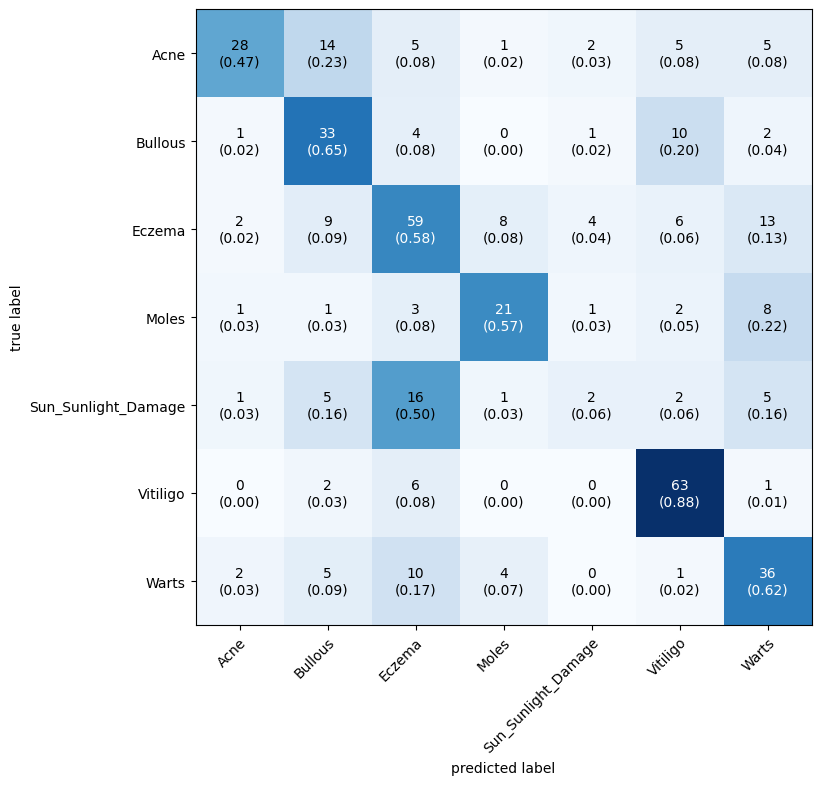

In [21]:
fig,ax=plot_confusion_matrix(conf_mat=cm,figsize=(8,8),show_normed=True, class_names=class_list)
plt.show()

In [22]:
print('test accuracy: {0:2f}'.format((np.diagonal(cm).sum()/cm.sum().sum()*100)))

test accuracy: 58.880779


<Axes: >

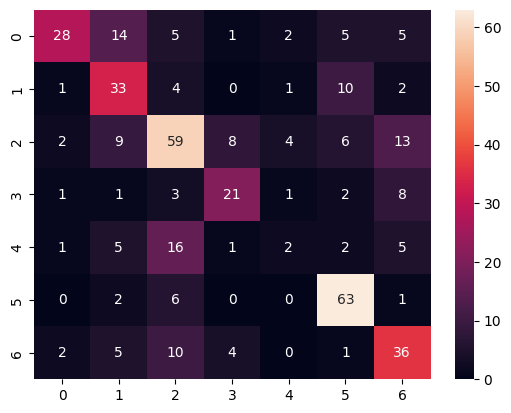

In [23]:
import seaborn as sns
sns.heatmap(cm, annot=True)

<Axes: >

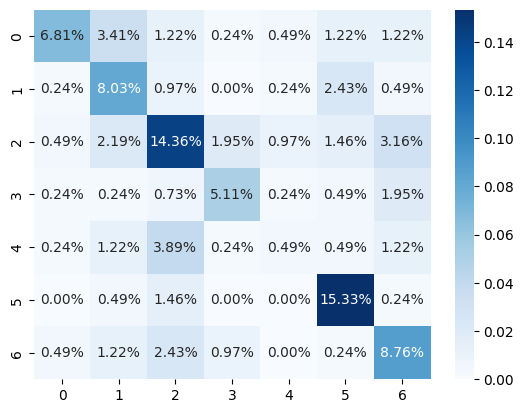

In [24]:
sns.heatmap(
        cm/np.sum(cm), 
        annot=True, 
        fmt='.2%', 
        cmap='Blues'
    )

In [25]:
import sklearn.metrics as metrics
class_list = []
for keys in test_set.class_indices.keys():
    class_list.append(keys)

class_list

classify_report = metrics.classification_report(
        y_true=test_labels, 
        y_pred=rounded_predictions,
        target_names=class_list
    )

print('classify_report : \n', classify_report)

classify_report : 
                      precision    recall  f1-score   support

               Acne       0.80      0.47      0.59        60
            Bullous       0.48      0.65      0.55        51
             Eczema       0.57      0.58      0.58       101
              Moles       0.60      0.57      0.58        37
Sun_Sunlight_Damage       0.20      0.06      0.10        32
           Vitiligo       0.71      0.88      0.78        72
              Warts       0.51      0.62      0.56        58

           accuracy                           0.59       411
          macro avg       0.55      0.55      0.53       411
       weighted avg       0.58      0.59      0.57       411



In [26]:
overall_accuracy = metrics.accuracy_score(
        y_true=test_labels, 
        y_pred=rounded_predictions
    )
acc_for_each_class = metrics.precision_score(
        y_true=test_labels, 
        y_pred=rounded_predictions, 
        average=None
    )
average_accuracy = np.mean(acc_for_each_class)
score = metrics.accuracy_score(
        y_true=test_labels, 
        y_pred=rounded_predictions
    )

print('ac_for_each_class : \n', acc_for_each_class)
print('average_accuracy: {0:2f}'.format(average_accuracy))
print('overall_accuracy: {0:2f}'.format(overall_accuracy))
print('score: {0:f}'.format(score))

ac_for_each_class : 
 [0.8        0.47826087 0.57281553 0.6        0.2        0.70786517
 0.51428571]
average_accuracy: 0.553318
overall_accuracy: 0.588808
score: 0.588808


In [27]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(test_labels, predict[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(test_labels))]
p_fpr, p_tpr, _ = roc_curve(test_labels, random_probs, pos_label=1)

(1, 224, 224, 3)


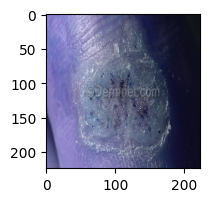

In [36]:
import cv2
import numpy as np
image=cv2.imread("Splitted datasets/test/Warts/warts-common-33.jpeg")
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_resized=cv2.resize(image, (img_width, img_height))
image=np.expand_dims(img_resized,axis=0)
print(image.shape)

plt.figure(figsize = (2,2))
plt.imshow(img_resized)
plt.show()

In [37]:


prediction = new_model.predict(image)
print(prediction)

class_output = class_list[np.argmax(prediction)]
print(class_output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
[[0.01597553 0.02434161 0.07498851 0.04845928 0.00649143 0.02650585
  0.8032378 ]]
Warts


In [38]:
predicted_acuracy = ("{:.2%}".format(np.array(prediction[0])[np.argmax(prediction)]))
print(predicted_acuracy)

80.32%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


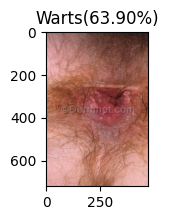

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


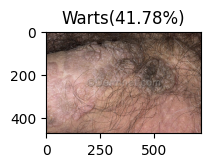

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


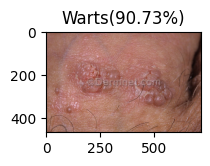

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


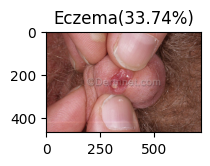

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


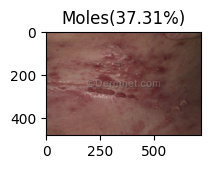

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


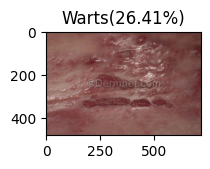

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


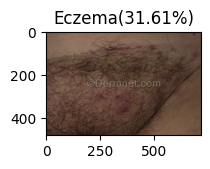

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


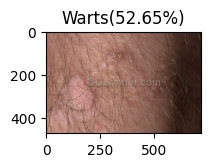

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


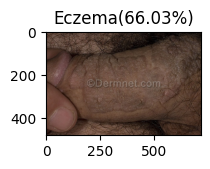

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


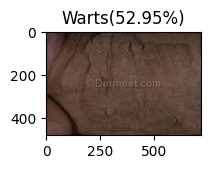

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


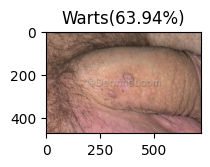

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


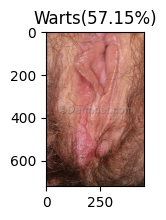

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


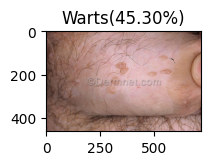

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


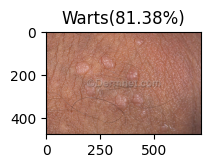

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


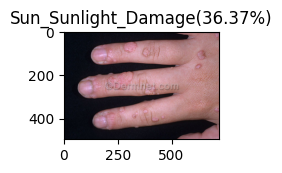

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


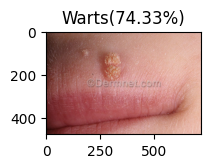

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


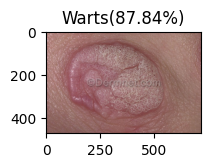

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


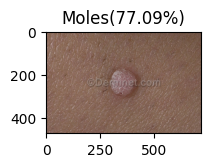

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


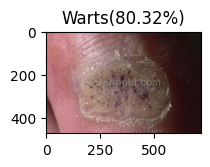

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


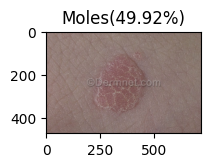

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


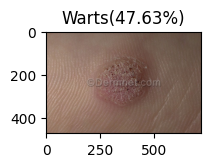

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


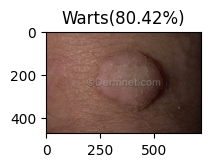

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


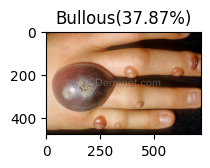

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


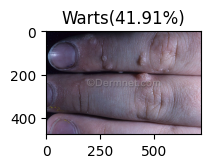

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


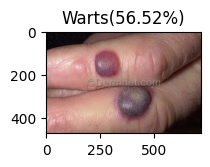

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


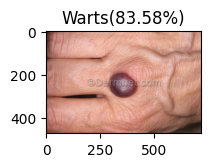

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


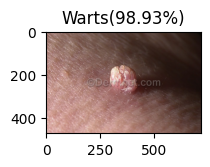

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


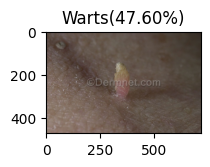

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


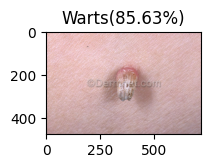

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


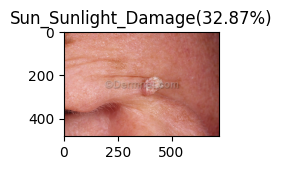

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


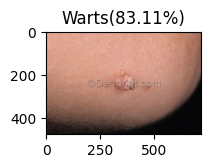

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


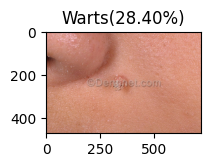

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


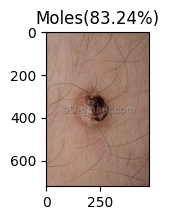

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


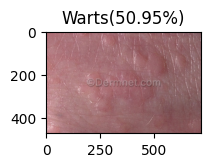

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


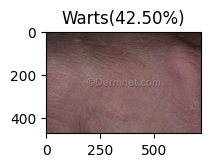

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


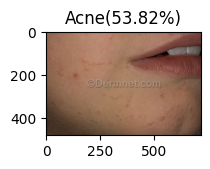

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


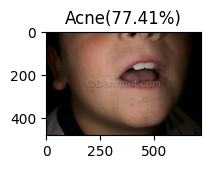

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


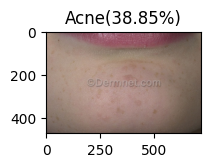

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


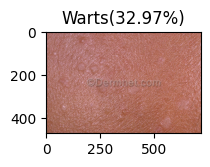

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


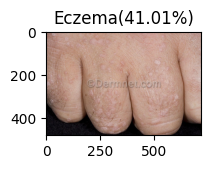

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


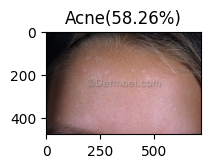

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


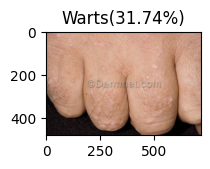

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


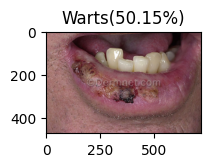

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


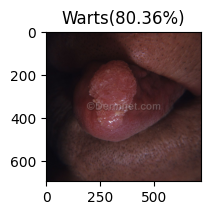

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


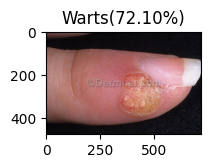

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


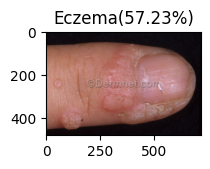

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


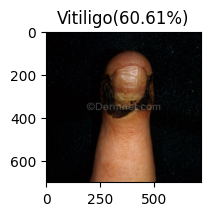

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


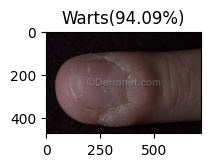

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


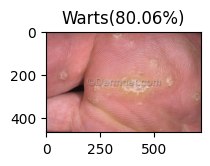

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


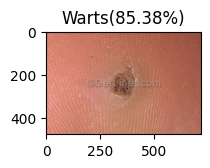

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


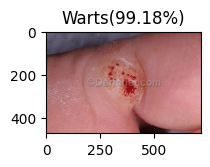

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


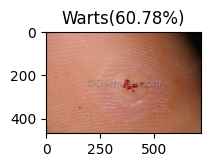

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


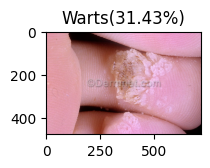

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


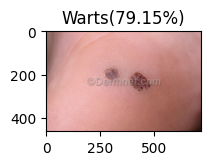

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


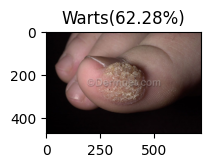

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


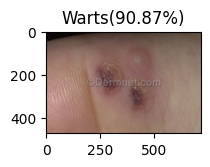

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


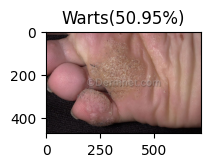

----------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


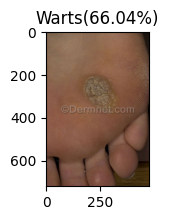

----------------------------------------------------------------------------------


In [40]:
import os
import cv2
import numpy as np
path = "Splitted datasets/test/Warts"
for img in os.listdir(path):
    try:
        image = cv2.imread(os.path.join(path, img))
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        img_resized=cv2.resize(image, (img_width, img_height))
        new_image=np.expand_dims(img_resized,axis=0)
        # print(image.shape)

        prediction = new_model.predict(new_image)

        class_output = class_list[np.argmax(prediction)]
        #print(class_output)
        predicted_acuracy = ("{:.2%}".format(np.array(prediction[0])[np.argmax(prediction)]))
        #print(predicted_acuracy)
        
        plt.figure(figsize = (2,2))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.title(class_output + "(" + predicted_acuracy + ")")
        plt.show()

    except Exception as e:
        print(e)
    print("----------------------------------------------------------------------------------")

In [46]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, save_img

# Configure image augmentation
datagen = ImageDataGenerator(
    rotation_range=30,        # Rotate images up to 30 degrees
    width_shift_range=0.2,    # Shift image width by 20%
    height_shift_range=0.2,   # Shift image height by 20%
    shear_range=0.2,          # Shear transformation
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Flip images horizontally
    fill_mode='nearest'       # Fill in gaps after transformations
)

# Define the directory containing original images
image_dir = "datasets/train/warts"  # Replace with the directory containing your images

# Process each image in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(('.jpg', '.png', '.jpeg')):  # Include supported file types
        img_path = os.path.join(image_dir, filename)  # Full path to the image
        img = load_img(img_path)  # Load the image
        img_array = img_to_array(img)  # Convert to NumPy array
        img_array = img_array.reshape((1, *img_array.shape))  # Add batch dimension

        # Generate augmented images and save them in the same directory
        i = 0
        for batch in datagen.flow(
            img_array,
            batch_size=1,
            save_to_dir=image_dir,
            save_prefix=filename.split('.')[0] + "_aug",  # Add '_aug' prefix to distinguish
            save_format='jpg'  # Save in JPG format
        ):
            i += 1
            if i >= 5:  # Generate 5 augmented images per original image
                break

print("Image augmentation complete! Check the directory for augmented images.")


Image augmentation complete! Check the directory for augmented images.
